# **Import**

In [1]:
import pandas as pd
import ast
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

# **Read**

In [ ]:
transaksi= pd.read_csv('/content/drive/MyDrive/Final_Project/Dataset/transactions.csv')
customer = pd.read_csv('/content/drive/MyDrive/Final_Project/Dataset/customer.csv')
# product = pd.read_csv('/content/drive/MyDrive/Final_Project/Dataset/product.csv', error_bad_lines=False)

# **Cek info**

In [ ]:
transaksi.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [ ]:
transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

# **Data discovery**

In [ ]:
#function for data_check
def cek_data(df_trans):
    missing = df_trans.isnull().sum()
    per_mis = 100*(missing/len(df_trans))
    data_type = df_trans.dtypes
    number_unique = df_trans.nunique()
    return pd.DataFrame({"Missing" : missing,
                        "Percent_Missing" : per_mis,
                        "data_type": data_type,
                        "number_unique" : number_unique})

In [ ]:
cek_data(transaksi)

,Missing,Percent_Missing,data_type,number_unique
created_at,0,0.000000,object,852584
customer_id,0,0.000000,int64,50705
booking_id,0,0.000000,object,852584
session_id,0,0.000000,object,852584
product_metadata,0,0.000000,object,852566
payment_method,0,0.000000,object,5
payment_status,0,0.000000,object,2
promo_amount,0,0.000000,int64,15180
promo_code,526048,61.700431,object,8
shipment_fee,0,0.000000,int64,6


In [ ]:
cek_data(customer)

,Missing,Percent_Missing,data_type,number_unique
customer_id,0,0.0,int64,100000
first_name,0,0.0,object,707
last_name,0,0.0,object,173
username,0,0.0,object,100000
email,0,0.0,object,100000
gender,0,0.0,object,2
birthdate,0,0.0,object,13003
device_type,0,0.0,object,2
device_id,0,0.0,object,100000
device_version,0,0.0,object,86


In [ ]:
transaksi.product_metadata

0         [{'product_id': 54728, 'quantity': 1, 'item_pr...
1         [{'product_id': 16193, 'quantity': 1, 'item_pr...
2         [{'product_id': 53686, 'quantity': 4, 'item_pr...
3         [{'product_id': 20228, 'quantity': 1, 'item_pr...
4         [{'product_id': 55220, 'quantity': 1, 'item_pr...
                                ...                        
852579    [{'product_id': 30642, 'quantity': 2, 'item_pr...
852580    [{'product_id': 19394, 'quantity': 1, 'item_pr...
852581    [{'product_id': 13079, 'quantity': 4, 'item_pr...
852582    [{'product_id': 11312, 'quantity': 1, 'item_pr...
852583    [{'product_id': 47433, 'quantity': 1, 'item_pr...
Name: product_metadata, Length: 852584, dtype: object

explode product_metadata

In [ ]:
# select transaction success only
transaksi = transaksi[transaksi['payment_status'] == 'Success']

In [ ]:
import ast
import json
transaksi['product_metadata'] = transaksi['product_metadata'].astype('string')
print(transaksi.info())

#apply literal_eval function
import ast
transaksi['product_metadata'] = transaksi['product_metadata'].map(lambda x: ast.literal_eval(x))

#explode data
transaksi = transaksi.explode('product_metadata')

#reset_index, karena terjadi penambahan row data(efek dari explode)
transaksi.reset_index(inplace = True)

#drop index column, karena ada index baru
transaksi.drop('index', axis=1, inplace = True)

#menggunakan function json_normalize untuk mensplit dict data
metadata_split = pd.json_normalize(transaksi['product_metadata'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815964 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              815964 non-null  object 
 1   customer_id             815964 non-null  int64  
 2   booking_id              815964 non-null  object 
 3   session_id              815964 non-null  object 
 4   product_metadata        815964 non-null  string 
 5   payment_method          815964 non-null  object 
 6   payment_status          815964 non-null  object 
 7   promo_amount            815964 non-null  int64  
 8   promo_code              312599 non-null  object 
 9   shipment_fee            815964 non-null  int64  
 10  shipment_date_limit     815964 non-null  object 
 11  shipment_location_lat   815964 non-null  float64
 12  shipment_location_long  815964 non-null  float64
 13  total_amount            815964 non-null  int64  
dtypes: float64(2), int64

In [ ]:
transaksi.drop('product_metadata' ,axis = 1, inplace = True)
transaksi = pd.concat([transaksi,metadata_split], axis = 1, join="outer")

In [ ]:
transaksi

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201030,2020-11-12T18:19:20.074873Z,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,NaN,10000,2020-11-18T18:06:06.493534Z,-6.286732,106.902229,287688,42915,1,277688
1201031,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1201032,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1201033,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [ ]:
transaksi.to_csv('/content/drive/MyDrive/Final_Project/Dataset/final.csv', index=False)

# run script from here

In [2]:
transaksi = pd.read_csv('/content/drive/MyDrive/Final_Project/Dataset/final.csv')

In [3]:
transaksi['created_at'] = transaksi['created_at'].astype('datetime64')
transaksi['year'] = transaksi['created_at'].dt.strftime('%Y')
transaksi['yearmonth'] = transaksi['created_at'].dt.strftime('%Y-%m')
# transaksi['day'] = transaksi['created_at'].dt.strftime('%d')

In [4]:
transaksi

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,year,yearmonth
0,2018-07-29 15:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,2018,2018-07
1,2018-07-30 12:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,2018,2018-07
2,2018-09-15 11:51:17.365620,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,2018,2018-09
3,2018-11-01 11:23:48.365620,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,2018,2018-11
4,2018-12-18 11:20:30.365620,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,2018,2018-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201030,2020-11-12 18:19:20.074873,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,NaN,10000,2020-11-18T18:06:06.493534Z,-6.286732,106.902229,287688,42915,1,277688,2020,2020-11
1201031,2021-12-09 07:35:18.222046,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213,2021,2021-12
1201032,2021-12-11 01:20:36.944593,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835,2021,2021-12
1201033,2019-12-18 11:01:09.623382,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646,2019,2019-12


In [5]:
print(f'Data dari {min(transaksi.yearmonth)} sampai dengan {max(transaksi.yearmonth)}')

Data dari 2016-06 sampai dengan 2022-07


In [6]:
transaksi_agg = transaksi.groupby(['yearmonth','customer_id'], as_index=False)['promo_amount','shipment_fee','total_amount','quantity','item_price'].mean()

<ipython-input-6-8944f42c8d4c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  transaksi_agg = transaksi.groupby(['yearmonth','customer_id'], as_index=False)['promo_amount','shipment_fee','total_amount','quantity','item_price'].mean()


In [7]:
transaksi_agg

,yearmonth,customer_id,promo_amount,shipment_fee,total_amount,quantity,item_price
0,2016-06,74089,0.0,10000.000000,6.407950e+05,3.000000,210265.000000
1,2016-07,221,0.0,0.000000,4.674360e+05,1.000000,467436.000000
2,2016-07,837,3570.0,10000.000000,3.797160e+05,2.000000,186643.000000
3,2016-07,933,5855.0,0.000000,2.379780e+05,1.000000,243833.000000
4,2016-07,1022,0.0,0.000000,2.448620e+05,1.000000,244862.000000
...,...,...,...,...,...,...,...
565536,2022-07,99936,0.0,12142.857143,2.612161e+06,1.142857,245551.857143
565537,2022-07,99976,0.0,10000.000000,6.567838e+05,1.000000,196779.000000
565538,2022-07,99986,0.0,10000.000000,3.793770e+05,1.000000,369377.000000
565539,2022-07,99988,9658.0,10000.000000,7.059450e+05,1.000000,235201.000000


In [8]:
transaksi_freq = transaksi.groupby(['yearmonth','customer_id'], as_index=False)['created_at'].nunique()
transaksi_freq = transaksi_freq.rename(columns = {'created_at':'freq_trx'})

In [9]:
transaksi_agg = transaksi_freq.merge(transaksi_agg, how='left', on=['yearmonth','customer_id'])

In [10]:
transaksi_agg

,yearmonth,customer_id,freq_trx,promo_amount,shipment_fee,total_amount,quantity,item_price
0,2016-06,74089,1,0.0,10000.000000,6.407950e+05,3.000000,210265.000000
1,2016-07,221,1,0.0,0.000000,4.674360e+05,1.000000,467436.000000
2,2016-07,837,1,3570.0,10000.000000,3.797160e+05,2.000000,186643.000000
3,2016-07,933,1,5855.0,0.000000,2.379780e+05,1.000000,243833.000000
4,2016-07,1022,1,0.0,0.000000,2.448620e+05,1.000000,244862.000000
...,...,...,...,...,...,...,...,...
565536,2022-07,99936,2,0.0,12142.857143,2.612161e+06,1.142857,245551.857143
565537,2022-07,99976,2,0.0,10000.000000,6.567838e+05,1.000000,196779.000000
565538,2022-07,99986,1,0.0,10000.000000,3.793770e+05,1.000000,369377.000000
565539,2022-07,99988,1,9658.0,10000.000000,7.059450e+05,1.000000,235201.000000


## memisahkan data tahunan dan bulan dalam tahun tersebut

In [11]:
# fungsi untuk memisahkan data pertahun
def dataTahun(tahun):
  bulans = {}
  for bulan in range(1, 13):
    bulan_str = f'{tahun}-{bulan:02d}'
    bulans[bulan] = transaksi_agg[transaksi_agg.yearmonth == bulan_str]
  return bulans

In [12]:
print(f'Data dari {min(transaksi.yearmonth)} sampai dengan {max(transaksi.yearmonth)}')

Data dari 2016-06 sampai dengan 2022-07


In [13]:
tahun2016 = dataTahun('2016')
tahun2017 = dataTahun('2017')
tahun2018 = dataTahun('2018')
tahun2019 = dataTahun('2019')
tahun2020 = dataTahun('2020')
tahun2021 = dataTahun('2021')
tahun2022 = dataTahun('2022')

## labeling data pertahun

In [14]:
#create func for label churn
def label(df):
    if (df['yearmonth_x'] == 0) | (df['yearmonth_y'] == 0):
        return 1 #1 adalah customer label churn
    elif (df['yearmonth_x'] != 0) & (df['yearmonth_y'] != 0):
        return 0 #0 adalah customer level tidak churn
    else:
        return " "

In [15]:
tahun2016[6] # data transaksi pada tahun 2016 bulan 6 hanya ada 1 transaksi

,yearmonth,customer_id,freq_trx,promo_amount,shipment_fee,total_amount,quantity,item_price
0,2016-06,74089,1,0.0,10000.0,640795.0,3.0,210265.0


In [16]:
tahun2016[7] # data transaksi bulan 7 tahun 2016

,yearmonth,customer_id,freq_trx,promo_amount,shipment_fee,total_amount,quantity,item_price
1,2016-07,221,1,0.0,0.0,467436.0,1.0,467436.0
2,2016-07,837,1,3570.0,10000.0,379716.0,2.0,186643.0
3,2016-07,933,1,5855.0,0.0,237978.0,1.0,243833.0
4,2016-07,1022,1,0.0,0.0,244862.0,1.0,244862.0
5,2016-07,1718,1,0.0,5000.0,246521.0,1.0,241521.0
...,...,...,...,...,...,...,...,...
264,2016-07,96545,1,2096.0,10000.0,298239.0,1.0,290335.0
265,2016-07,97732,1,4458.0,10000.0,275853.0,1.0,270311.0
266,2016-07,97965,1,15031.0,10000.0,591513.0,1.0,596544.0
267,2016-07,99139,1,0.0,10000.0,2299147.0,7.0,327021.0


In [17]:
# churn from every year
def churnTahun(data, data2):
    flags = {}
    for bulan in range(1,13):
      if len(data[bulan]) <= 1:   # skip bulan yang hanya punya 1 transaksi
        continue
      else:
        if bulan <=11:
          flags[bulan] = data[bulan].merge(data[bulan+1][['customer_id','yearmonth']], on='customer_id', how='outer')
          flags[bulan].fillna(0, inplace = True)
          flags[bulan]['churn'] = flags[bulan].apply(label, axis =1)
        else:
          flags[bulan] = data[bulan].merge(data2[bulan-11][['customer_id','yearmonth']], on='customer_id', how='outer')
          flags[bulan].fillna(0, inplace = True)
          flags[bulan]['churn'] = flags[bulan].apply(label, axis =1)
    return flags

In [18]:
churn2016 = churnTahun(tahun2016, tahun2017)
churn2017 = churnTahun(tahun2017, tahun2018)
churn2018 = churnTahun(tahun2018, tahun2019)
churn2019 = churnTahun(tahun2019, tahun2020)
churn2020 = churnTahun(tahun2020, tahun2021)
churn2021 = churnTahun(tahun2021, tahun2022)

In [19]:
churn2022 = churnTahun(tahun2022, tahun2022)

In [20]:
churn2022[7]

,yearmonth_x,customer_id,freq_trx,promo_amount,shipment_fee,total_amount,quantity,item_price,yearmonth_y,churn
0,2022-07,20,4,0.0,8181.818182,2.207351e+06,2.000000,266751.909091,0,1
1,2022-07,28,1,0.0,0.000000,6.187840e+05,2.000000,309392.000000,0,1
2,2022-07,45,1,4439.0,10000.000000,2.515430e+05,1.000000,245982.000000,0,1
3,2022-07,76,1,0.0,0.000000,1.036220e+05,1.000000,103622.000000,0,1
4,2022-07,88,1,0.0,0.000000,8.582020e+05,1.000000,286067.333333,0,1
...,...,...,...,...,...,...,...,...,...,...
9969,2022-07,99936,2,0.0,12142.857143,2.612161e+06,1.142857,245551.857143,0,1
9970,2022-07,99976,2,0.0,10000.000000,6.567838e+05,1.000000,196779.000000,0,1
9971,2022-07,99986,1,0.0,10000.000000,3.793770e+05,1.000000,369377.000000,0,1
9972,2022-07,99988,1,9658.0,10000.000000,7.059450e+05,1.000000,235201.000000,0,1


In [21]:
churn2016[11]

,yearmonth_x,customer_id,freq_trx,promo_amount,shipment_fee,total_amount,quantity,item_price,yearmonth_y,churn
0,2016-11,185,1.0,2545.0,0.0,220610.0,1.000000,223155.000000,0,1
1,2016-11,215,1.0,0.0,5000.0,608630.0,1.000000,201210.000000,0,1
2,2016-11,528,1.0,0.0,15000.0,177338.0,1.000000,162338.000000,2016-12,0
3,2016-11,650,1.0,0.0,0.0,246217.0,1.000000,246217.000000,0,1
4,2016-11,651,1.0,7375.0,0.0,2500446.0,1.571429,264508.714286,0,1
...,...,...,...,...,...,...,...,...,...,...
1343,0,99372,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-12,1
1344,0,99418,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-12,1
1345,0,99777,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-12,1
1346,0,99804,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-12,1


## concate data berlabel dari 2016-2022

In [22]:
def concatData(dict): # concate data perbualan dalam tahun tertentu
  data = []
  for i in list(dict.keys()):
      data.append(dict[i])

  dataframe = pd.concat(data)

  return dataframe

In [23]:
data2016 = concatData(churn2016)
data2017 = concatData(churn2017)
data2018 = concatData(churn2018)
data2019 = concatData(churn2019)
data2020 = concatData(churn2020)
data2021 = concatData(churn2021)
data2022 = concatData(churn2022)

In [24]:
final_churn = pd.concat([data2016,data2017,data2018,data2019,data2020,data2021,data2022])

In [25]:
final_churn

,yearmonth_x,customer_id,freq_trx,promo_amount,shipment_fee,total_amount,quantity,item_price,yearmonth_y,churn
0,2016-07,221,1.0,0.0,0.000000,4.674360e+05,1.000000,467436.000000,0,1
1,2016-07,837,1.0,3570.0,10000.000000,3.797160e+05,2.000000,186643.000000,0,1
2,2016-07,933,1.0,5855.0,0.000000,2.379780e+05,1.000000,243833.000000,0,1
3,2016-07,1022,1.0,0.0,0.000000,2.448620e+05,1.000000,244862.000000,0,1
4,2016-07,1718,1.0,0.0,5000.000000,2.465210e+05,1.000000,241521.000000,0,1
...,...,...,...,...,...,...,...,...,...,...
9969,2022-07,99936,2.0,0.0,12142.857143,2.612161e+06,1.142857,245551.857143,0,1
9970,2022-07,99976,2.0,0.0,10000.000000,6.567838e+05,1.000000,196779.000000,0,1
9971,2022-07,99986,1.0,0.0,10000.000000,3.793770e+05,1.000000,369377.000000,0,1
9972,2022-07,99988,1.0,9658.0,10000.000000,7.059450e+05,1.000000,235201.000000,0,1


## data cleaning

In [26]:
final_churn.isna().sum()

yearmonth_x     0
customer_id     0
freq_trx        0
promo_amount    0
shipment_fee    0
total_amount    0
quantity        0
item_price      0
yearmonth_y     0
churn           0
dtype: int64

In [27]:
outliers = final_churn.drop(['yearmonth_x', 'yearmonth_y', 'customer_id'], axis=1)

In [28]:
outliers.head()

,freq_trx,promo_amount,shipment_fee,total_amount,quantity,item_price,churn
0,1.0,0.0,0.0,467436.0,1.0,467436.0,1
1,1.0,3570.0,10000.0,379716.0,2.0,186643.0,1
2,1.0,5855.0,0.0,237978.0,1.0,243833.0,1
3,1.0,0.0,0.0,244862.0,1.0,244862.0,1
4,1.0,0.0,5000.0,246521.0,1.0,241521.0,1


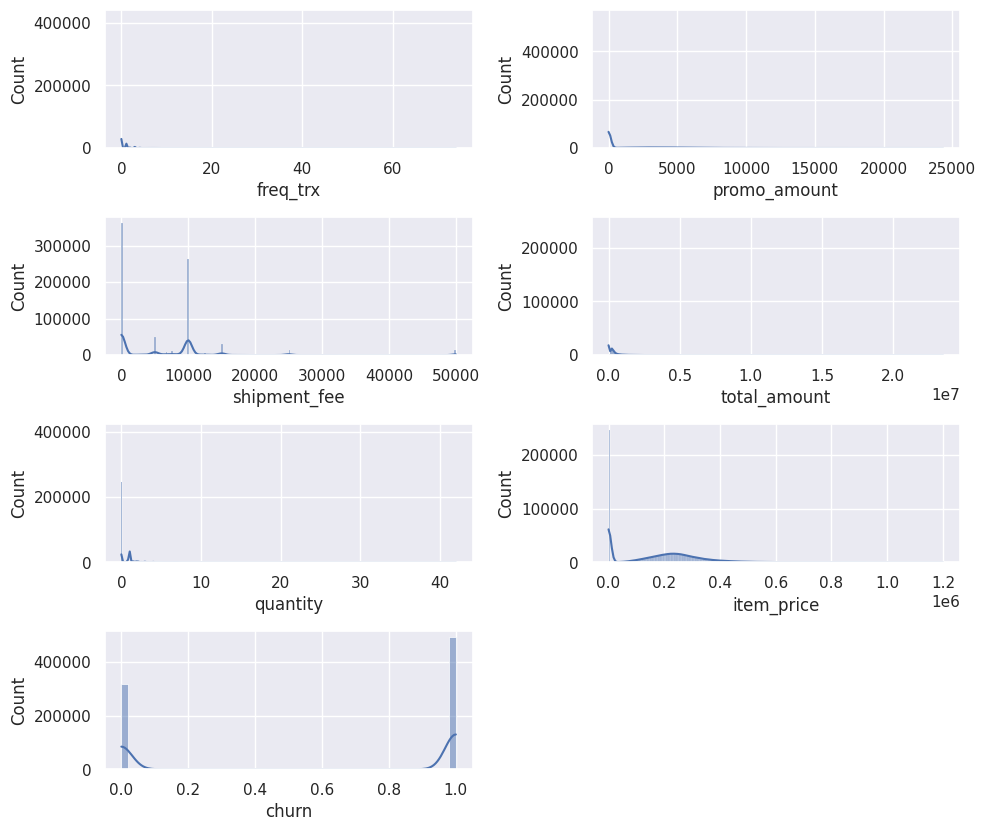

In [29]:
fig = plt.figure(figsize=(10,10))
for indexs, col in enumerate(outliers.columns):
    plt.subplot(5,2, indexs+1)
    sns.histplot(outliers[col], kde=True)
fig.tight_layout(pad=1.0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

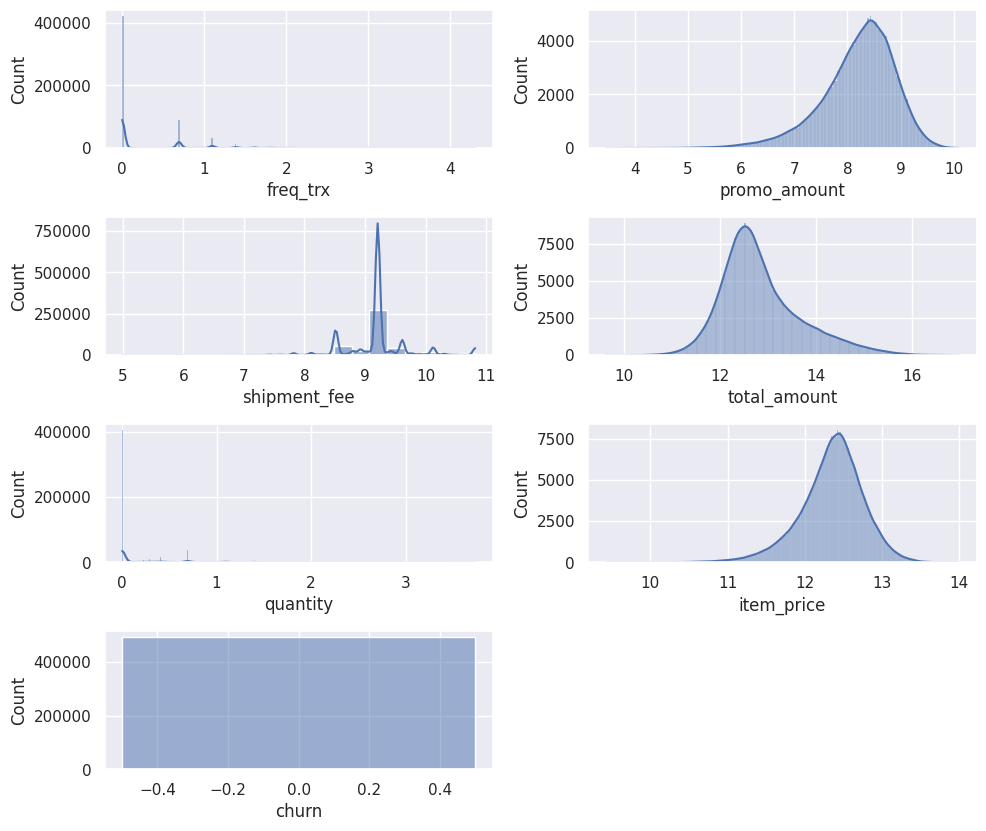

In [30]:
fig = plt.figure(figsize=(10,10))
for indexs, col in enumerate(outliers.columns):
    plt.subplot(5,2, indexs+1)
    sns.histplot(np.log(outliers[col]), kde=True)
fig.tight_layout(pad=1.0)

## Baseline model

Split data X and Y

In [31]:
df_model = final_churn.drop(['customer_id','yearmonth_x','yearmonth_y'], axis=1)

In [32]:
df_model

,freq_trx,promo_amount,shipment_fee,total_amount,quantity,item_price,churn
0,1.0,0.0,0.000000,4.674360e+05,1.000000,467436.000000,1
1,1.0,3570.0,10000.000000,3.797160e+05,2.000000,186643.000000,1
2,1.0,5855.0,0.000000,2.379780e+05,1.000000,243833.000000,1
3,1.0,0.0,0.000000,2.448620e+05,1.000000,244862.000000,1
4,1.0,0.0,5000.000000,2.465210e+05,1.000000,241521.000000,1
...,...,...,...,...,...,...,...
9969,2.0,0.0,12142.857143,2.612161e+06,1.142857,245551.857143,1
9970,2.0,0.0,10000.000000,6.567838e+05,1.000000,196779.000000,1
9971,1.0,0.0,10000.000000,3.793770e+05,1.000000,369377.000000,1
9972,1.0,9658.0,10000.000000,7.059450e+05,1.000000,235201.000000,1


In [33]:
y= df_model['churn']
X= df_model.drop(['churn'],axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

Standart Scaler

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

DecisionTree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
predictdt_y_train = dt_model.predict(X_train)

In [36]:
from sklearn import metrics
def CariAkurasi(y, y_pred):
  acc = metrics.accuracy_score(y, y_pred)
  pre = metrics.precision_score(y, y_pred)
  rec = metrics.recall_score(y, y_pred)

  akurasi = {
      'Metrics' : ['Accuracy', 'Precision', 'Recall'],
      'Nilai': [acc, pre, rec],
      '%': [f'{acc:.2f}%',f'{pre:.2f}%',f'{rec:.2f}%']
  }
  return pd.DataFrame(akurasi)

In [37]:
print('Aakurasi untuk data train')
CariAkurasi(y_train, predictdt_y_train)

Aakurasi untuk data train


,Metrics,Nilai,%
0,Accuracy,0.976930,0.98%
1,Precision,0.992580,0.99%
2,Recall,0.969169,0.97%


In [38]:
print('Akurasi untuk data test')
CariAkurasi(y_test, predictdt_y)

Akurasi untuk data test


,Metrics,Nilai,%
0,Accuracy,0.728847,0.73%
1,Precision,0.781762,0.78%
2,Recall,0.767602,0.77%


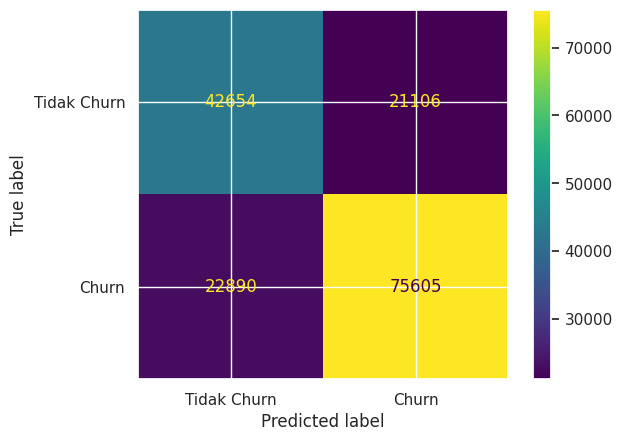

In [39]:
actual = y_test
predicted = predictdt_y

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Tidak Churn', 'Churn'])

cm_display.plot()
plt.show()

yg berbahaya adalah FP(False Positif) dan dapat dilihat nilainya masih tinggi

Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state= 42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [41]:
predictdt_y = lr_model.predict(X_test)
predictdt_y_train = lr_model.predict(X_train)

In [42]:
print('Akurasi untuk data test')
CariAkurasi(y_test, predictdt_y)

Akurasi untuk data test


,Metrics,Nilai,%
0,Accuracy,0.763742,0.76%
1,Precision,0.735573,0.74%
2,Recall,0.953612,0.95%


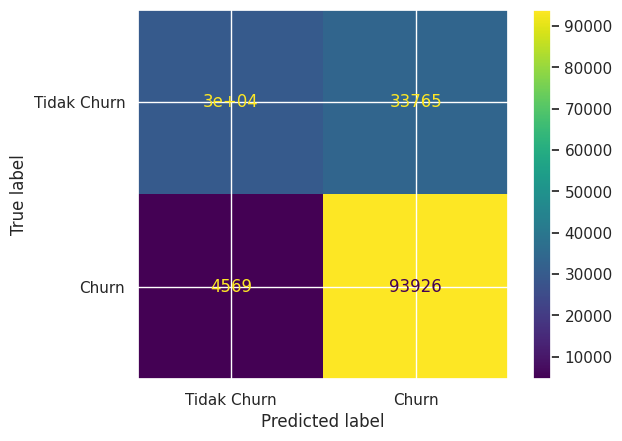

In [43]:
actual = y_test
predicted = predictdt_y

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Tidak Churn', 'Churn'])

cm_display.plot()
plt.show()

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
predictdt_y = rf_model.predict(X_test)
predictdt_y_train = rf_model.predict(X_train)

In [46]:
print('Akurasi untuk data test')
CariAkurasi(y_test, predictdt_y)

Akurasi untuk data test


,Metrics,Nilai,%
0,Accuracy,0.741401,0.74%
1,Precision,0.782952,0.78%
2,Recall,0.794152,0.79%


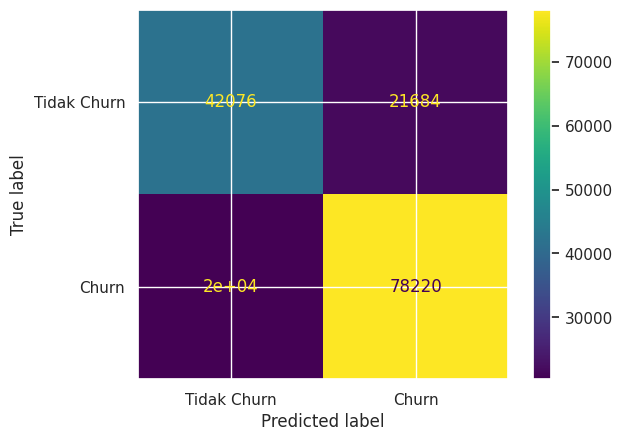

In [47]:
actual = y_test
predicted = predictdt_y

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Tidak Churn', 'Churn'])

cm_display.plot()
plt.show()

XGBC

In [48]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [49]:
predictdt_y = xgb_model.predict(X_test)
predictdt_y_train = xgb_model.predict(X_train)

In [50]:
print('Akurasi untuk data test')
CariAkurasi(y_test, predictdt_y)

Akurasi untuk data test


,Metrics,Nilai,%
0,Accuracy,0.767385,0.77%
1,Precision,0.730810,0.73%
2,Recall,0.976486,0.98%


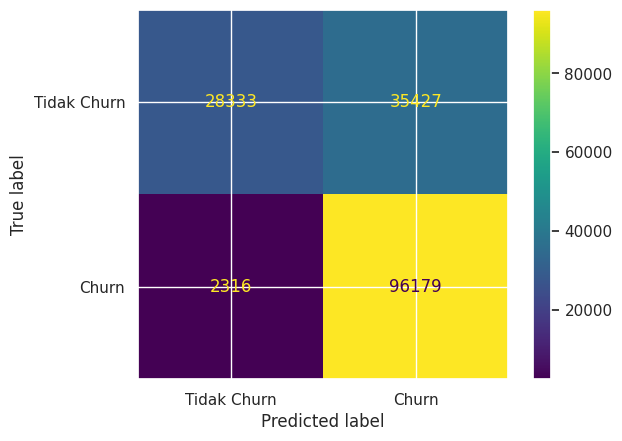

In [51]:
actual = y_test
predicted = predictdt_y

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Tidak Churn', 'Churn'])

cm_display.plot()
plt.show()

In [52]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_model = KNeighborsClassifier(n_neighbors=3)
# knn_model.fit(X_train,y_train)
# predictdt_y = knn_model.predict(X_test)
# predictdt_y_train = knn_model.predict(X_train)

In [53]:
# print('Aakurasi untuk data train')
# CariAkurasi(y_train, predictdt_y_train)

In [54]:
# print('Akurasi untuk data test')
# CariAkurasi(y_test, predictdt_y)

In [55]:
# actual = y_test
# predicted = predictdt_y

# confusion_matrix = metrics.confusion_matrix(actual, predicted)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Tidak Churn', 'Churn'])

# cm_display.plot()
# plt.show()

In [56]:
# from sklearn import svm
# svm_model = svm.SVC()
# svm_model.fit(X_train,y_train)
# predictdt_y = svm_model.predict(X_test)
# predictdt_y_train = svm_model.predict(X_train)

In [57]:
# print('Akurasi untuk data test')
# CariAkurasi(y_test, predictdt_y)